In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/weather_prediction.zip')

In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.shape

(1461, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [ ]:
df.replace({'weather': {'drizzle':0, 'rain':1, 'sun':2, 'snow':3, 'fog': 4}}, inplace = True)

/tmp/ipython-input-356885210.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'weather': {'drizzle':0, 'rain':1, 'sun':2, 'snow':3, 'fog': 4}}, inplace = True)


In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,1
2,2012-01-03,0.8,11.7,7.2,2.3,1
3,2012-01-04,20.3,12.2,5.6,4.7,1
4,2012-01-05,1.3,8.9,2.8,6.1,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import pandas as pd
import numpy as np

# --- 1. Load your DataFrame (Replace with your actual data loading) ---
# Assuming your DataFrame 'df' is loaded at this point.
# For demonstration purposes, creating a sample DataFrame matching your structure.
data = {
    'Date': ['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
             '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
             '2012-02-01', '2012-02-02', '2012-02-03', '2012-03-01', '2012-03-02'],
    'precipitation': [0.0, 10.9, 0.8, 20.3, 1.3, 5.0, 0.0, 2.1, 8.5, 0.0, 1.0, 3.2, 0.0, 15.0, 2.5],
    'temp_max': [12.8, 10.6, 11.7, 12.2, 8.9, 7.0, 10.0, 11.5, 13.0, 10.5, 9.0, 10.2, 8.8, 14.0, 13.5],
    'temp_min': [5.0, 2.8, 7.2, 5.6, 2.8, 0.0, 3.0, 4.5, 6.0, 3.0, 1.0, 2.0, 0.5, 7.0, 6.5],
    'wind': [4.7, 4.5, 2.3, 4.7, 6.1, 3.0, 5.0, 4.0, 5.5, 3.5, 2.0, 3.0, 1.5, 6.0, 5.0],
    'weather': ['sun', 'rain', 'drizzle', 'rain', 'drizzle', 'fog', 'sun', 'rain', 'snow', 'sun',
                'sun', 'rain', 'sun', 'rain', 'drizzle'] # Assuming 'weather' is categorical here
}
df = pd.DataFrame(data)

print("Original DataFrame Head:")
print(df.head())
print("\nOriginal DataFrame Info:")
df.info()

# --- 2. Convert 'Date' column to datetime objects ---
df['Date'] = pd.to_datetime(df['Date'])
print("\nDataFrame Info after converting 'Date' to datetime:")
df.info()

# --- 3. Sort DataFrame by Date (CRUCIAL for lagged features) ---
# Ensure your data is sorted chronologically before creating any lagged features.
df = df.sort_values(by='Date').reset_index(drop=True)
print("\nDataFrame Head after sorting by Date:")
print(df.head())

# --- 4. Feature Engineering from Date ---

# a. Basic Time Features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek # Monday=0, Sunday=6
df['DayOfYear'] = df['Date'].dt.dayofyear # 1 to 365/366
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int) # 1 to 52/53
df['Quarter'] = df['Date'].dt.quarter
df['IsWeekend'] = (df['Date'].dt.dayofweek >= 5).astype(int) # 1 if Saturday/Sunday, 0 otherwise

# b. Cyclical Features (Sine/Cosine Transformation)
# This is important for tree models to understand the cyclic nature of time features.
# For Month (12 months)
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# For Day of Year (approx. 365.25 days in a year)
df['DayOfYear_sin'] = np.sin(2 * np.pi * df['DayOfYear'] / 365.25)
df['DayOfYear_cos'] = np.cos(2 * np.pi * df['DayOfYear'] / 365.25)

# For Day of Week (7 days)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

# --- 5. Generate Lagged Features (Highly impactful for time series prediction) ---
# These are previous day's values, often strong predictors for current/future weather.
# Choose features relevant to your prediction task.
lag_features = ['precipitation', 'temp_max', 'temp_min', 'wind']
for feature in lag_features:
    df[f'{feature}_lag_1'] = df[feature].shift(1) # Previous day's value
    # You can add more lags, e.g., .shift(2), .shift(3) for 2/3 days prior

# --- 6. Handle NaN values introduced by lagging ---
# The first row(s) after shifting will have NaN values.
# Common strategies:
# a) Drop rows with NaN (if only a few): df.dropna(inplace=True)
# b) Fill with a specific value (e.g., 0, or mean/median of the column).
# c) Fill using forward-fill (ffill) or backward-fill (bfill) - use with caution if data is not strictly time-series dependent.
#    For weather, a simple fill with the mean/median of the feature is often robust for the few initial NaNs.
for feature in lag_features:
    # Option 1: Fill with the mean of the respective original feature (best for tree models)
    df[f'{feature}_lag_1'].fillna(df[feature].mean(), inplace=True)

    # Option 2: Drop the rows with NaNs (if you can afford to lose the first few rows)
    # df.dropna(subset=[f'{feature}_lag_1'], inplace=True)

print("\nDataFrame Head with all new date and lagged features:")
print(df.head())

# --- 7. Drop the original 'Date' column ---
# It's no longer needed in its raw form.
df = df.drop('Date', axis=1)

print("\nFinal DataFrame Head after dropping original 'Date' column:")
print(df.head())
print("\nFinal DataFrame Info (ready for model training):")
df.info()

Original DataFrame Head:
         Date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7      sun
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3  drizzle
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1  drizzle

Original DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15 non-null     object 
 1   precipitation  15 non-null     float64
 2   temp_max       15 non-null     float64
 3   temp_min       15 non-null     float64
 4   wind           15 non-null     float64
 5   weather        15 non-null     object 
dtypes: float64(4), object(2)
memory usage: 852.0+ bytes

DataFrame Info after converting 'Date' to datetime:
<

/tmp/ipython-input-183004393.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[f'{feature}_lag_1'].fillna(df[feature].mean(), inplace=True)


In [ ]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,Year,Month,Day,DayOfWeek,DayOfYear,...,Month_sin,Month_cos,DayOfYear_sin,DayOfYear_cos,DayOfWeek_sin,DayOfWeek_cos,precipitation_lag_1,temp_max_lag_1,temp_min_lag_1,wind_lag_1
0,0.0,12.8,5.0,4.7,2,2012,1,1,6,1,...,0.5,0.866025,0.017202,0.999852,-0.781831,0.623490,4.706667,10.913333,3.793333,4.053333
1,10.9,10.6,2.8,4.5,1,2012,1,2,0,2,...,0.5,0.866025,0.034398,0.999408,0.000000,1.000000,0.000000,12.800000,5.000000,4.700000
2,0.8,11.7,7.2,2.3,0,2012,1,3,1,3,...,0.5,0.866025,0.051584,0.998669,0.781831,0.623490,10.900000,10.600000,2.800000,4.500000
3,20.3,12.2,5.6,4.7,1,2012,1,4,2,4,...,0.5,0.866025,0.068755,0.997634,0.974928,-0.222521,0.800000,11.700000,7.200000,2.300000
4,1.3,8.9,2.8,6.1,0,2012,1,5,3,5,...,0.5,0.866025,0.085906,0.996303,0.433884,-0.900969,20.300000,12.200000,5.600000,4.700000


In [ ]:
corr = df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

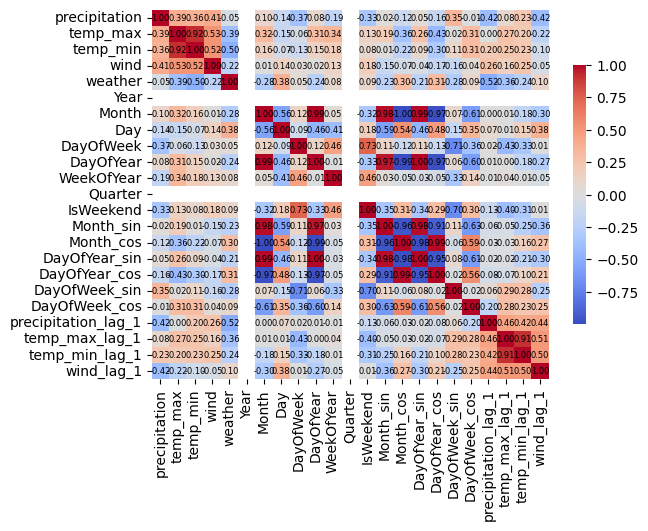

In [ ]:
sns.heatmap(corr, annot=True, fmt=".2f",cmap = 'coolwarm',
             linecolor='black',   # Color of the separator lines.
    cbar_kws={'shrink': 0.7}, # Adjust color bar size if it's too large or small.
    # --- This is the key adjustment for text size inside cells ---
    annot_kws={"size": 6, "color": "black"})
figure_size = (15,15)
plt.show

In [ ]:
df = df.drop('IsWeekend', axis=1)

In [ ]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,Year,Month,Day,DayOfWeek,DayOfYear,...,Month_sin,Month_cos,DayOfYear_sin,DayOfYear_cos,DayOfWeek_sin,DayOfWeek_cos,precipitation_lag_1,temp_max_lag_1,temp_min_lag_1,wind_lag_1
0,0.0,12.8,5.0,4.7,2,2012,1,1,6,1,...,0.5,0.866025,0.017202,0.999852,-0.781831,0.623490,4.706667,10.913333,3.793333,4.053333
1,10.9,10.6,2.8,4.5,1,2012,1,2,0,2,...,0.5,0.866025,0.034398,0.999408,0.000000,1.000000,0.000000,12.800000,5.000000,4.700000
2,0.8,11.7,7.2,2.3,0,2012,1,3,1,3,...,0.5,0.866025,0.051584,0.998669,0.781831,0.623490,10.900000,10.600000,2.800000,4.500000
3,20.3,12.2,5.6,4.7,1,2012,1,4,2,4,...,0.5,0.866025,0.068755,0.997634,0.974928,-0.222521,0.800000,11.700000,7.200000,2.300000
4,1.3,8.9,2.8,6.1,0,2012,1,5,3,5,...,0.5,0.866025,0.085906,0.996303,0.433884,-0.900969,20.300000,12.200000,5.600000,4.700000


In [ ]:
X = df.drop('weather', axis=1)
Y = df['weather']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
models = {
    'lg':LogisticRegression(),
    'dtc':DecisionTreeClassifier(),
    'rfc':RandomForestClassifier(),
    'knn':KNeighborsClassifier()
    }

In [ ]:
for name,model in models.items():
    model.fit(X_train,Y_train)
    Ypred = model.predict(X_test)
    print(f"{name} with accuracy : {accuracy_score(Y_test,Ypred)} ")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lg with accuracy : 0.0 
dtc with accuracy : 0.6666666666666666 
rfc with accuracy : 0.0 
knn with accuracy : 0.0 
